In [1]:
##safety executable check (for conda env)
import sys
sys.executable

'/Users/roshanwithanage/opt/anaconda3/envs/e_learning/bin/python'

In [7]:
# coding= UTF-8
import glob
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import specgram
import soundfile as sf

##Return audio features 
def feature_extraction(file_name):
    #X, sample_rate = sf.read(file_name, dtype='float32')
    X , sample_rate = librosa.load(file_name, sr=None) #Can also load file using librosa
    if X.ndim > 1:
        X = X[:,0]
    X = X.T
    
    ## stFourier Transform
    stft = np.abs(librosa.stft(X))
            
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=20).T, axis=0) #Returns N_mel coefs
    rms = np.mean(librosa.feature.rms(y=X).T, axis=0) #RMS Energy for each Frame (Stanford's). Returns 1 value 
    spectral_flux = np.mean(librosa.onset.onset_strength(y=X, sr=sample_rate).T, axis=0) #Spectral Flux (Stanford's). Returns 1 Value
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=X).T, axis=0) #Returns 1 value
    
    #mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T, axis=0) #Returns 128 values
    #chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0) #Returns 12 values
    #contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sample_rate).T, axis=0) #Returns 7 values
    #tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(X), sr=sample_rate).T, axis=0) #tonal centroid features Returns 6 values
    
    ##Return computed audio features
    return mfccs, rms, spectral_flux, zcr
    
# Audio parsing: Function makes call for feature extraction and returns array with features and labels 
def parse_audio_files(parent_dir, sub_dirs, file_ext='*.wav'): # Audio Format

    n_mfccs = 20 # This variable is tunneable with each run
    number_of_features = 3 + n_mfccs
    #number_of_features = 154 + n_mfccs # 154 are the total values returned by rest of computed features
    features, labels = np.empty((0,number_of_features)), np.empty(0)
    
    ##Extract features for each audio file
    for label, sub_dir in enumerate(sub_dirs): ##The enumerate() function adds a counter to an iterable.
        for file_name in glob.glob(os.path.join(parent_dir, sub_dir, file_ext)): ##parent is data, sub_dirs are the classes
            print("Actual File Name: ", file_name)
            try:
                mfccs, rms, spectral_flux, zcr = feature_extraction(file_name)
                #mfccs, zcr, mel, chroma, contrast, tonnetz = feature_extraction(file_name)
            except Exception as e:
                print("[Error] there was an error in feature extraction. %s" % (e))
                continue
             
            extracted_features = np.hstack([mfccs, rms, spectral_flux, zcr])
            #print "Total Extracted Features: ", len(extracted_features) #This helps us identify really how many features are being computed
            features = np.vstack([features, extracted_features]) #Stack arrays in sequence vertically (row wise).
            labels = np.append(labels, label)
        print("Extracted features from %s, done" % (sub_dir))
    return np.array(features), np.array(labels, dtype = np.int) ## arrays with features and corresponding labels for each audio

In [8]:
#Read audio classes directories
import os
audio_subdirectories = os.listdir("data/")
audio_subdirectories.sort()
print('Audio Subdirs: ', audio_subdirectories)

Audio Subdirs:  ['amlodipine', 'benadryl', 'benzonatate', 'diphenhydramin', 'hydromet', 'lisinopril', 'losartan', 'metaprolol', 'panadol', 'thyronorm']


In [9]:
##Get features and labels
#NumPy array files are created. Files are binary files to store numpy arrays

# Parse Audio Files Function Call
features, labels = parse_audio_files('data', audio_subdirectories) #(parent dir,sub dirs)
np.save('feat.npy', features) 
np.save('label.npy', labels)

Actual File Name:  data/amlodipine/AmlodipineN123.wav
Actual File Name:  data/amlodipine/amlodipine41.wav
Actual File Name:  data/amlodipine/AmlodipineAm.wav
Actual File Name:  data/amlodipine/amlodipine81.wav
Actual File Name:  data/amlodipine/amlodipine912.wav
Actual File Name:  data/amlodipine/amlodipine6156.wav
Actual File Name:  data/amlodipine/AmlodipineMad15.wav
Actual File Name:  data/amlodipine/AmlodipineAm12.wav
Actual File Name:  data/amlodipine/AmlodipineTha156.wav
Actual File Name:  data/amlodipine/amlodipine61234.wav
Actual File Name:  data/amlodipine/AmlodipineAm1.wav
Actual File Name:  data/amlodipine/amlodipine91.wav
Actual File Name:  data/amlodipine/Amlodipine2123.wav
Actual File Name:  data/amlodipine/amlodipine8156.wav
Actual File Name:  data/amlodipine/amlodipine4156.wav
Actual File Name:  data/amlodipine/amlodipine71234.wav
Actual File Name:  data/amlodipine/AmlodipineMad1.wav
Actual File Name:  data/amlodipine/amlodipine9.wav
Actual File Name:  data/amlodipine/A

Actual File Name:  data/benadryl/benadril61234.wav
Actual File Name:  data/benadryl/BenadrylDim15.wav
Actual File Name:  data/benadryl/benadril715.wav
Actual File Name:  data/benadryl/BenadrylAm123.wav
Actual File Name:  data/benadryl/Benadryl123.wav
Actual File Name:  data/benadryl/BenadrylTh15.wav
Actual File Name:  data/benadryl/benadryl81.wav
Actual File Name:  data/benadryl/BenadrylAm.wav
Actual File Name:  data/benadryl/benadryl9.wav
Actual File Name:  data/benadryl/Benadryl31234.wav
Actual File Name:  data/benadryl/Benadryl1234.wav
Actual File Name:  data/benadryl/benadril515.wav
Actual File Name:  data/benadryl/benadryl915.wav
Actual File Name:  data/benadryl/BenadrylN.wav
Actual File Name:  data/benadryl/benadryl8.wav
Actual File Name:  data/benadryl/BenadrylDim.wav
Actual File Name:  data/benadryl/BenadrylT.wav
Actual File Name:  data/benadryl/benadril7123.wav
Actual File Name:  data/benadryl/BenadrylMad1.wav
Actual File Name:  data/benadryl/benadryl1012.wav
Actual File Name:

Actual File Name:  data/benzonatate/BenzonatateMad2.wav
Extracted features from benzonatate, done
Actual File Name:  data/diphenhydramin/Diphenhydramine navo15.wav
Actual File Name:  data/diphenhydramin/DiphenhydraminN12.wav
Actual File Name:  data/diphenhydramin/Diphenhydramin112.wav
Actual File Name:  data/diphenhydramin/dyphenhydramine4123.wav
Actual File Name:  data/diphenhydramin/DiphenhydraminSin.wav
Actual File Name:  data/diphenhydramin/dyphendydromine8156.wav
Actual File Name:  data/diphenhydramin/DiphenhydraminAm12.wav
Actual File Name:  data/diphenhydramin/dyphenhydramine51234.wav
Actual File Name:  data/diphenhydramin/DiphenhydraminN123.wav
Actual File Name:  data/diphenhydramin/dyphenhydramine512.wav
Actual File Name:  data/diphenhydramin/dyphendydromine812.wav
Actual File Name:  data/diphenhydramin/Diphenhydramin312.wav
Actual File Name:  data/diphenhydramin/Diphenhydramin11234.wav
Actual File Name:  data/diphenhydramin/dyphendydromine71234.wav
Actual File Name:  data/dip

Actual File Name:  data/hydromet/HydrometN156.wav
Actual File Name:  data/hydromet/hydromate8123.wav
Actual File Name:  data/hydromet/HydrometN15.wav
Actual File Name:  data/hydromet/HydrometTh.wav
Actual File Name:  data/hydromet/HydrometTh156.wav
Actual File Name:  data/hydromet/HydrometSin1234.wav
Actual File Name:  data/hydromet/HydromateDim12.wav
Actual File Name:  data/hydromet/Hydromet115.wav
Actual File Name:  data/hydromet/HydrometN1.wav
Actual File Name:  data/hydromet/HydrometAm156.wav
Actual File Name:  data/hydromet/Hydromet3123.wav
Actual File Name:  data/hydromet/hydromate71234.wav
Actual File Name:  data/hydromet/Hydromet navo156.wav
Actual File Name:  data/hydromet/hydromate615.wav
Actual File Name:  data/hydromet/HydrometN.wav
Actual File Name:  data/hydromet/HydrometSin156.wav
Actual File Name:  data/hydromet/Hydromet navo1.wav
Actual File Name:  data/hydromet/HydrometAm1234.wav
Actual File Name:  data/hydromet/HydrometMad123.wav
Actual File Name:  data/hydromet/Hydr

Actual File Name:  data/losartan/losartan51234.wav
Actual File Name:  data/losartan/Losartan31.wav
Actual File Name:  data/losartan/losartan515.wav
Actual File Name:  data/losartan/LosartanTh156.wav
Actual File Name:  data/losartan/losartan715.wav
Actual File Name:  data/losartan/Losartan2123.wav
Actual File Name:  data/losartan/LosartanN12.wav
Actual File Name:  data/losartan/LosartanSin.wav
Actual File Name:  data/losartan/LosartanMad1.wav
Actual File Name:  data/losartan/Losartan112.wav
Actual File Name:  data/losartan/losartan512.wav
Actual File Name:  data/losartan/LosartanAm12.wav
Actual File Name:  data/losartan/Losartan315.wav
Actual File Name:  data/losartan/LosartanMad.wav
Actual File Name:  data/losartan/Losartan115.wav
Actual File Name:  data/losartan/LosartanN123.wav
Actual File Name:  data/losartan/Losartan21.wav
Actual File Name:  data/losartan/LosartanN15.wav
Actual File Name:  data/losartan/losartan712.wav
Actual File Name:  data/losartan/losartan41234.wav
Actual File 

Actual File Name:  data/panadol/Panadol Navo15.wav
Actual File Name:  data/panadol/panadol91234.wav
Actual File Name:  data/panadol/PanadolSin1234.wav
Actual File Name:  data/panadol/panadol515.wav
Actual File Name:  data/panadol/Panadol111.wav
Actual File Name:  data/panadol/Panadol Navo.wav
Actual File Name:  data/panadol/Panadol312.wav
Actual File Name:  data/panadol/panadol61.wav
Actual File Name:  data/panadol/Panadol Navo12.wav
Actual File Name:  data/panadol/panadol712.wav
Actual File Name:  data/panadol/panadol71.wav
Actual File Name:  data/panadol/panadol11234.wav
Actual File Name:  data/panadol/panadol101.wav
Actual File Name:  data/panadol/panadol115.wav
Actual File Name:  data/panadol/PanadolN15.wav
Actual File Name:  data/panadol/panadol8.wav
Actual File Name:  data/panadol/PanadolN.wav
Actual File Name:  data/panadol/Panadol315.wav
Actual File Name:  data/panadol/panadol81234.wav
Actual File Name:  data/panadol/panadol9.wav
Actual File Name:  data/panadol/panadol512.wav
A

/var/folders/9k/rs2z2g9s4g50r_yly9w6whk40000gn/T/ipykernel_65945/1816287671.py:58: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.array(features), np.array(labels, dtype = np.int) ## arrays with features and corresponding labels for each audio


In [10]:
#Load np files
import numpy as np
features= np.load('feat.npy')
print(len(features[1])) #Each element of features array corresponds to the features of an individual frame: [ [Features Segment1], ... [Features Segment n] ]
print(features[:10]) #First ten Segment Features

23
[[-4.90522675e+02  9.10306702e+01  1.35166016e+01  3.19400463e+01
   1.72973061e+01  1.17775717e+01 -1.01082945e+01  9.29817390e+00
  -1.27590418e+00 -5.55702734e+00  6.15610409e+00 -5.22885418e+00
  -5.12489271e+00  6.18098974e-01 -6.12654591e+00 -3.65664172e+00
   2.64843559e+00 -3.46984220e+00 -9.31374645e+00  3.74633217e+00
   2.66235527e-02  1.16607761e+00  4.40289408e-02]
 [-3.80499786e+02  1.32941101e+02  1.59703245e+01  7.78380060e+00
   1.34770775e+01  1.61578140e+01  7.15472460e+00  4.54466152e+00
  -2.31862640e+00 -4.43888283e+00 -5.86867273e-01 -4.28266096e+00
   6.07073247e-01  3.72771335e+00  1.41748443e-01  2.28048891e-01
   1.71391517e-01 -1.60505641e+00  4.80332583e-01 -1.79757392e+00
   4.69517298e-02  1.03530502e+00  2.88622510e-02]
 [-5.51497803e+02  8.07696838e+01  7.11100578e+00  3.70585136e+01
   1.25006447e+01  2.19209156e+01 -4.20387506e+00  7.72636938e+00
  -5.17727852e+00 -1.50976694e+00  4.89541292e+00 -5.22702932e+00
  -7.56580448e+00 -2.70689988e+00 -1.

In [11]:
print(len(features))

928


### Data Exploration

In [12]:
# THIS STEP IS FOR DATA VISUALIZATION: Label integer encoding 
labels = np.load('label.npy') #10 labels total
#print(labels)

# For future label de-encoding
label_classes = np.array(['amlodipine', 'benadryl', 'benzonatate', 'diphenhydramin', 'hydromet', 'lisinopril', 'losartan', 'metaprolol', 'panadol', 'thyronorm'])
#print(label_classes)

In [13]:
#Load np files
import numpy as np
features= np.load('feat.npy')

#Pandas dataframe with N features for each audio
import pandas as pd
df = pd.DataFrame(features)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,-490.522675,91.030670,13.516602,31.940046,17.297306,11.777572,-10.108294,9.298174,-1.275904,-5.557027,...,0.618099,-6.126546,-3.656642,2.648436,-3.469842,-9.313746,3.746332,0.026624,1.166078,0.044029
1,-380.499786,132.941101,15.970325,7.783801,13.477077,16.157814,7.154725,4.544662,-2.318626,-4.438883,...,3.727713,0.141748,0.228049,0.171392,-1.605056,0.480333,-1.797574,0.046952,1.035305,0.028862
2,-551.497803,80.769684,7.111006,37.058514,12.500645,21.920916,-4.203875,7.726369,-5.177279,-1.509767,...,-2.706900,-1.896954,-13.172129,1.113325,4.529854,-10.468284,-1.324055,0.013721,1.345436,0.077469
3,-395.008148,159.162704,-15.979342,14.783356,14.706390,18.696365,-9.361326,3.144843,8.110441,-6.037132,...,-1.714297,-5.715265,-4.803910,2.378431,-4.845522,-4.711992,3.670774,0.031887,1.194270,0.034533
4,-403.560699,159.174606,-19.012440,3.016543,14.715907,19.504953,0.487210,8.642989,9.111320,-5.397028,...,2.490139,-6.319479,-5.869413,-1.162704,-3.862430,0.117073,4.631248,0.022964,1.122847,0.039384


#### Visualize the MFCC series

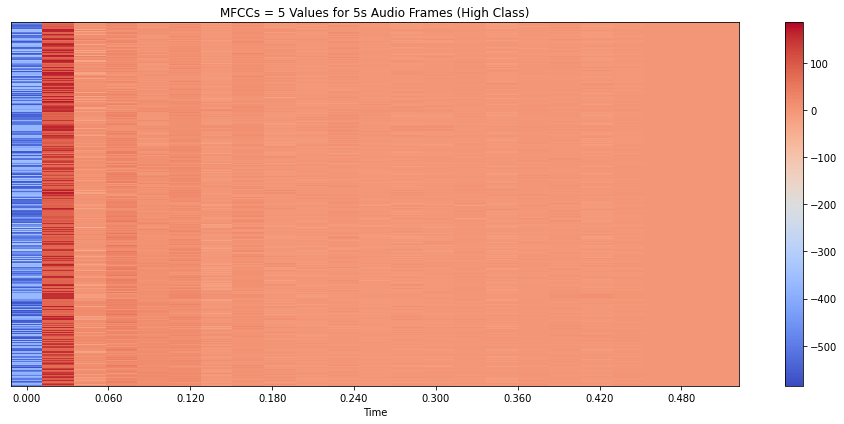

In [14]:
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(13, 6))
librosa.display.specshow(features, x_axis='time')
plt.colorbar()
plt.title('MFCCs = 5 Values for 5s Audio Frames (High Class)')
plt.tight_layout()
plt.savefig('test saving.png')
#Correct Interpretation of MFCC Spectrograms??: https://dsp.stackexchange.com/questions/38830/whats-the-correct-graphical-interpretation-of-a-series-of-mfcc-vectors

In [15]:
features.shape #1424 Frames (Segments), 5 MFCCs
len(features[1])

23

### Multilayer Perceptron (MLP) for multi-class softmax classification (Keras Tensorflow)

In [17]:
# coding= UTF-8
import numpy as np
import keras
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import SGD
from sklearn.model_selection import train_test_split

# Fix random seed number
np.random.seed(7)

# Load the data
X = np.load('feat.npy')
y = np.load('label.npy').ravel() #Return a contiguous flattened array.

number_of_features = len(X[1]) #This is variable with each run
number_of_classes = 10

# Sample data randomly
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) #70% Train, 30% Test

# Neural Network Architecture
model = Sequential() # Define Sequential model

# Using relu on the first two layers and softmax on the output layer

# 1st Layer
#N neurons, Number_Fatures-dimensional vectors
model.add(Dense(512, input_dim=number_of_features, activation='relu')) #32, 64, 128, 256, 512, 1024
model.add(Dropout(0.5))

# 2nd Layer
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

# 3rd Layer. Output 3 neurons corresponding the number of classes
# The sigmoid function is used for the two-class logistic regression, 
# whereas the softmax function is used for the multiclass logistic regression 
model.add(Dense(number_of_classes, activation='softmax'))

# Model Compilation. Loss for multi-class classification problem
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
rmsprop = 'rmsprop'
adam = 'adam'
model.compile(loss='categorical_crossentropy',
              optimizer= rmsprop, #rmsprop better than sgd
              metrics=['accuracy'])

# Convert labels to categorical one-hot encoding
y_train = np_utils.to_categorical(y_train-1, num_classes= number_of_classes) # Convert class vector into binary Matrix
y_test = np_utils.to_categorical(y_test-1, num_classes= number_of_classes)

# Train and test
model.fit(X_train, y_train, epochs=300, batch_size=64) #batch 32, 64, 128, 256, 512
score, acc = model.evaluate(X_test, y_test, batch_size=64)

model.save('last.h5')

Epoch 1/300
11/11 [==============================] - 1s 4ms/step - loss: 51.0276 - accuracy: 0.0909
Epoch 2/300
11/11 [==============================] - 0s 4ms/step - loss: 27.1673 - accuracy: 0.0909
Epoch 3/300
11/11 [==============================] - 0s 4ms/step - loss: 15.2278 - accuracy: 0.1048
Epoch 4/300
11/11 [==============================] - 0s 4ms/step - loss: 8.7494 - accuracy: 0.1217
Epoch 5/300
11/11 [==============================] - 0s 4ms/step - loss: 5.7292 - accuracy: 0.1125
Epoch 6/300
11/11 [==============================] - 0s 4ms/step - loss: 3.6640 - accuracy: 0.1140
Epoch 7/300
11/11 [==============================] - 0s 4ms/step - loss: 2.9057 - accuracy: 0.0955
Epoch 8/300
11/11 [==============================] - 0s 4ms/step - loss: 2.6851 - accuracy: 0.1094
Epoch 9/300
11/11 [==============================] - 0s 3ms/step - loss: 2.6334 - accuracy: 0.1186
Epoch 10/300
11/11 [==============================] - 0s 4ms/step - loss: 2.4835 - accuracy: 0.1063
Epoch 

Epoch 83/300
11/11 [==============================] - 0s 4ms/step - loss: 1.8689 - accuracy: 0.2743
Epoch 84/300
11/11 [==============================] - 0s 3ms/step - loss: 1.8031 - accuracy: 0.3051
Epoch 85/300
11/11 [==============================] - 0s 3ms/step - loss: 1.8517 - accuracy: 0.2835
Epoch 86/300
11/11 [==============================] - 0s 4ms/step - loss: 1.8036 - accuracy: 0.2804
Epoch 87/300
11/11 [==============================] - 0s 3ms/step - loss: 1.8471 - accuracy: 0.2851
Epoch 88/300
11/11 [==============================] - 0s 4ms/step - loss: 1.7481 - accuracy: 0.3190
Epoch 89/300
11/11 [==============================] - 0s 3ms/step - loss: 1.7649 - accuracy: 0.3559
Epoch 90/300
11/11 [==============================] - 0s 3ms/step - loss: 1.6807 - accuracy: 0.3482
Epoch 91/300
11/11 [==============================] - 0s 4ms/step - loss: 1.7011 - accuracy: 0.3128
Epoch 92/300
11/11 [==============================] - 0s 4ms/step - loss: 1.6408 - accuracy: 0.3775


11/11 [==============================] - 0s 4ms/step - loss: 0.2049 - accuracy: 0.9276
Epoch 165/300
11/11 [==============================] - 0s 3ms/step - loss: 0.2527 - accuracy: 0.9076
Epoch 166/300
11/11 [==============================] - 0s 3ms/step - loss: 0.2564 - accuracy: 0.9060
Epoch 167/300
11/11 [==============================] - 0s 3ms/step - loss: 0.2248 - accuracy: 0.9260
Epoch 168/300
11/11 [==============================] - 0s 3ms/step - loss: 0.2153 - accuracy: 0.9322
Epoch 169/300
11/11 [==============================] - 0s 3ms/step - loss: 0.2660 - accuracy: 0.9260
Epoch 170/300
11/11 [==============================] - 0s 3ms/step - loss: 0.2251 - accuracy: 0.9322
Epoch 171/300
11/11 [==============================] - 0s 4ms/step - loss: 0.1939 - accuracy: 0.9337
Epoch 172/300
11/11 [==============================] - 0s 3ms/step - loss: 0.2016 - accuracy: 0.9307
Epoch 173/300
11/11 [==============================] - 0s 4ms/step - loss: 0.2768 - accuracy: 0.9153
Epoc

11/11 [==============================] - 0s 4ms/step - loss: 0.1305 - accuracy: 0.9584
Epoch 246/300
11/11 [==============================] - 0s 4ms/step - loss: 0.1088 - accuracy: 0.9599
Epoch 247/300
11/11 [==============================] - 0s 3ms/step - loss: 0.1408 - accuracy: 0.9569
Epoch 248/300
11/11 [==============================] - 0s 3ms/step - loss: 0.0510 - accuracy: 0.9861
Epoch 249/300
11/11 [==============================] - 0s 4ms/step - loss: 0.0986 - accuracy: 0.9707
Epoch 250/300
11/11 [==============================] - 0s 3ms/step - loss: 0.1682 - accuracy: 0.9492
Epoch 251/300
11/11 [==============================] - 0s 4ms/step - loss: 0.0648 - accuracy: 0.9784
Epoch 252/300
11/11 [==============================] - 0s 4ms/step - loss: 0.0833 - accuracy: 0.9630
Epoch 253/300
11/11 [==============================] - 0s 4ms/step - loss: 0.1421 - accuracy: 0.9522
Epoch 254/300
11/11 [==============================] - 0s 3ms/step - loss: 0.1467 - accuracy: 0.9553
Epoc

In [18]:
print('Test score:', score)
print('Test accuracy:', acc)

Test score: 0.21938343346118927
Test accuracy: 0.9820788502693176


In [19]:
from sklearn.ensemble import RandomForestClassifier #Random Forest classifier
import pandas as pd 
import numpy as np
np.random.seed(7)

In [21]:
import joblib

X = np.load('feat.npy') 
y = np.load('label.npy').ravel() 


#Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=6)

# Initialize classifier
rf_clf = RandomForestClassifier(n_estimators=350, n_jobs=2, random_state=6, max_features="auto") 

# Train model
rf_clf.fit(X_train, y_train)

# Make predictions
y_prediction = rf_clf.predict(X_test)

# # Evaluate accuracy
acc = rf_clf.score(X_test, y_test) 
print("Accuracy = %0.5f" %acc)

joblib.dump(rf_clf, "./random_forest.joblib")
    
loaded_rf = joblib.load("./random_forest.joblib")

ddd = loaded_rf.predict(X_test)
print(ddd)


Accuracy = 0.97491
[3 8 1 0 9 5 1 6 2 9 1 0 5 8 3 3 8 6 0 1 6 5 5 8 6 8 7 1 4 8 8 4 0 0 4 4 3
 3 3 0 5 3 9 3 8 3 9 3 4 4 3 3 1 8 3 8 2 1 4 2 5 0 5 4 3 4 1 0 8 3 3 4 5 5
 4 5 2 8 0 8 5 4 0 1 9 8 0 0 8 2 9 3 2 4 6 0 0 4 1 2 2 6 8 6 3 4 5 6 6 8 0
 1 8 0 8 4 3 9 0 3 6 6 8 6 9 1 6 6 5 4 9 2 3 5 2 2 9 1 1 8 1 5 3 5 2 8 2 8
 6 2 9 3 3 1 4 6 9 2 0 1 1 9 0 4 2 8 9 8 8 8 5 4 4 5 9 0 1 3 2 9 4 3 5 3 6
 3 8 5 6 2 0 4 9 3 2 2 6 0 0 3 8 9 1 1 1 0 8 4 6 9 6 6 4 6 3 6 9 8 6 6 1 1
 3 5 1 4 9 4 3 3 2 8 1 2 2 4 1 1 1 1 3 4 0 5 3 0 0 4 0 5 0 4 6 1 0 1 0 5 3
 5 2 0 2 3 9 5 5 4 2 3 9 5 1 9 8 5 9 9 4]


In [30]:
mfccs, rms, spectral_flux, zcr = feature_extraction('data/benzonatate/Benzonatate.wav')

In [31]:
extracted_features = np.hstack([mfccs, rms, spectral_flux, zcr])

In [32]:
print(extracted_features)

[-5.23230286e+02  8.07520905e+01  1.81522884e+01  2.71338749e+01
  1.20854483e+01  1.35101767e+01 -4.32296371e+00  8.75809097e+00
  2.97977272e-02  2.41381907e+00  1.32969201e+00 -7.22080755e+00
 -2.28135419e+00 -1.24426492e-01 -4.38923025e+00  1.84587133e+00
  4.52510309e+00 -1.57165921e+00 -9.30934131e-01  2.11912227e+00
  1.74278263e-02  1.07950759e+00  4.63184100e-02]


In [33]:
y_prediction = rf_clf.predict([extracted_features])

In [34]:
print(y_prediction)

[2]


In [35]:
print(X_test)

[[-2.96225464e+02  1.51864594e+02 -4.38221893e+01 ...  5.68090566e-02
   1.37540150e+00  6.77975574e-02]
 [-5.45569946e+02  7.69190979e+01  7.67749548e+00 ...  1.19528342e-02
   1.20204639e+00  1.08734809e-01]
 [-4.14773621e+02  1.62585297e+02 -2.15777664e+01 ...  1.31330378e-02
   1.09590828e+00  3.47006418e-02]
 ...
 [-5.10797974e+02  8.67755966e+01  9.25309277e+00 ...  2.06764340e-02
   1.14945865e+00  7.56236294e-02]
 [-4.96140839e+02  8.34161072e+01  6.56585407e+00 ...  2.78719217e-02
   8.70339811e-01  5.93142209e-02]
 [-5.27347534e+02  8.95729446e+01  5.45714426e+00 ...  1.29663888e-02
   1.22575021e+00  6.81464751e-02]]


In [36]:
print(y_prediction)

[2]


In [37]:
out_dict = {0:'amlodipine', 1:'benadryl', 2:'benzonatate', 3:'diphenhydramin',4: 'hydromet',5: 'lisinopril',6: 'losartan',7: 'metaprolol',8: 'panadol',9: 'thyronorm'}

print(out_dict[y_prediction[0]])

benzonatate
